#Расчёт потока частиц в детекторе. Учёт скорости плазмы относительно спутника.

Рассматривается случай, когда плазма движется относительно спутника.

Задача:
* Вычислить значения ионного потока для ионов водорода (протонов) для углов:
  * γ = 0
  * γ = 10
  * γ = 20
  * γ = 30
* Все расчеты провести для 3-х значений температур:
  * T = 3 000К,
  * T = 5 000K
  * T = 7 000К
* Для всех вычислений:
  * угол раствора коллиматора α = 5⸰
  * концентрация n=10^3 частиц в м3

Значения k и m взять из справочников.

Скорости плазмы:
  * Vпл = 6 км/c
  * Vпл = 7 км/c
  * Vпл = 8 км/с
Результаты привести в виде таблиц.


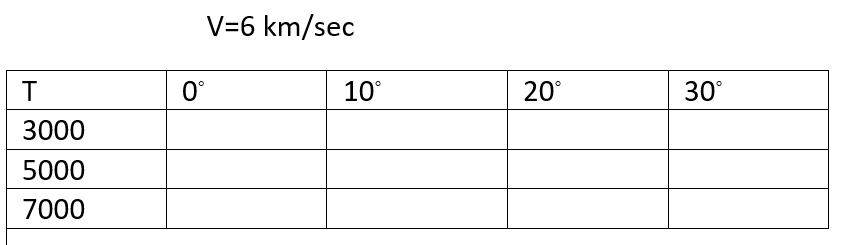

* Нарисовать графики, сгруппировав данные по скоростям плазмы и температурам. По оси х отложить угол, по оси y – потоки в логарифмическом масштабе.


In [1]:
import numpy as np

###Распределение Максвелла (по скоростям)

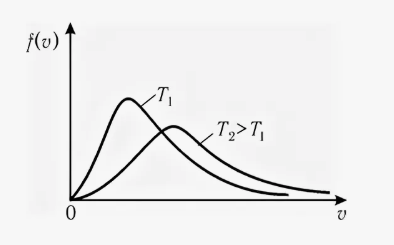

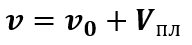

Здесь v, v0, Vпл – вектора скоростей частицы на входе в детектор, частицы в неподвижной плазме и самой плазмы.

Функция распределения Максвелла по модулю скорости (с учётом скорости плазмы)

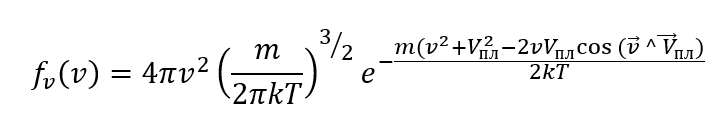

Здесь v – «микроскорость» частиц, m – масса иона, k – постоянная Больцмана, T – температура в К.

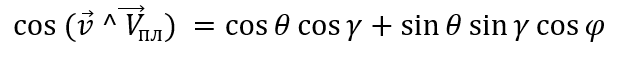

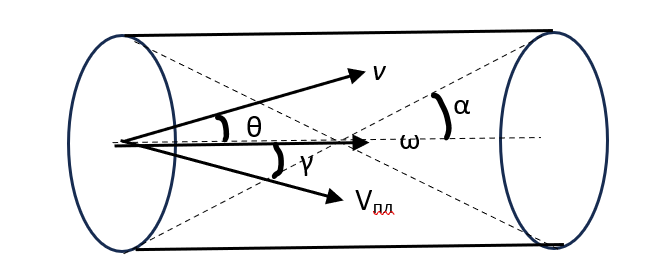

Здесь v – «микроскорость» частиц, ω – направление оси коллиматора, θ – угол между скоростью и осью коллиматора, α – угол раствора коллиматора, γ - угол между осью детектора и направлением вектора скорости плазмы Vпл.

ϕ - угол между плоскостями, содержащими ω, v и ω, Vпл

Выражение для потока частиц

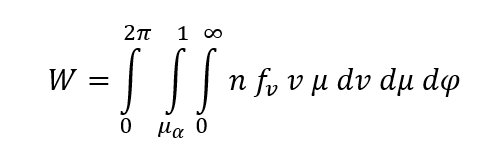

###Константы

In [2]:
k = 1.38e-23
m = 1.67e-27

In [ ]:
T = 5000
alpha = np.deg2rad(10)
v1 = 2000
v2 = 5000
n = 1

In [ ]:
mu_alpha = np.cos(alpha)

###Функция распределения Максвелла

In [ ]:
def maxwell_distribution(v):
  const = 4 * np.pi * (m / (2 * np.pi * k * T))**1.5

  f = v**2 * const * np.exp(-m * v**2 / (2 * k * T))

  return f

In [ ]:
def maxwell_integrand(v, mu):
    return n * maxwell_distribution(v) * v * mu

###Метод Симпсона

In [3]:
def simpson_method(f, a, b, n):
    if n % 2 != 0:
        n += 1

    h = (b - a) / n

    integral = f(a) + f(b)

    for i in range(1, n):
        x_i = a + i * h

        if i % 2 == 0:
            integral += 2 * f(x_i)
        else:
            integral += 4 * f(x_i)

    return integral * h / 3

###Расчёт значения ионного потока

In [ ]:
def calculate_ion_flow():
    num_intervals_v = 1000
    num_intervals_mu = 1000

    # Интегрирование от v1 до v2
    flow_v = simpson_method(lambda v: maxwell_integrand(v, 1), v1, v2, num_intervals_v)

    # Интегрирование от mu_alpha до 1
    flow_mu = simpson_method(lambda mu: flow_v, mu_alpha, 1, num_intervals_mu)

    # Интегрирование от 0 до 2pi
    ion_flow = 2 * np.pi * flow_mu

    return ion_flow

In [ ]:
print(f"Ионный поток: {calculate_ion_flow()}")

Ионный поток: 35.60805566526315
